# Introduction to Machine Learning

![sklearn](../static/sklearn.png)

Python is probably the most often used programming language to train and run machine learning models.

For shallow machine learning models, [`sklearn`](https://scikit-learn.org) is undoubtedly the most popular library you can use. Sklearn has tutorials (check this great [*getting started*](https://scikit-learn.org/stable/getting_started.html) and this [*common pitfalls*](https://scikit-learn.org/stable/common_pitfalls.html) tutorial!), toy-datasets, extensive descriptions for all models, algorithms and many more things. Its incredible and I highly highly recommed you to use this library, if you choose to continue working with machine learning.

When it comes to deep learning, python also offers a lot of options. Personally, I prefer to use [`PyTorch`](https://pytorch.org/), but there are other options. 

Anyway, we wont bother with deep learning in this course, so lets just skip straight to sklearn. As opposed to numpy, I prefer to directly import the classes and methods I use, instead of importing the whole module. I dont know why, but its what people just do, apparently.

The first thing we will do now is fetch the breast cancer dataset from sklearn. It is a common, easy to use dataset that allows us to apply a easy binary classification. It contains features computed from digitized images of a breast mass and a binary label: malignant (0) or benign (1).

In [ ]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
import numpy as np

#import for plotting
import seaborn as sns
import matplotlib.pyplot as plt

We set `as_frame=True` to get both X and y as dataframe objects. Sklearn estimators typically require numpy arrays as their input, but pandas is a nice way to look at your data in a meaningful way

In [9]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True)
print(X.shape,y.shape)

(569, 30) (569,)


To make our data more intuitive, we can create a new variable called `diagnosis` which holds the actual labels that correspond to 0 and 1 in our y variable. We should not use this to train our model, but it makes sense to use this variable for data exploration.

Before that, we should switch our 0 and 1s, so that a `malignant` tumor is the positive (1) class, and a `benignant` tumor is the negative (0) class.

In [ ]:
y = 1-y
diagnosis = y.map({1:"Malignant",0:"Benignant"})

In [19]:
X.head(n=10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [28]:
y.head(n=10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32

Inspecting the `shape` of our feature matrix **X**, we see that we have 569 `samples` and 30 `features`.

The ground truth label vector **y** is one-dimensional.

In [30]:
X.shape,y.shape

((569, 30), (569,))

### **Exercise**

It makes a lot of sense to exermine the data you are dealing with. Using the seaborn library, examine the distribution (how many entries there are) of the `y` variable.

**Hint**: 

You want to use  `sns.histplot` here.

In [ ]:
sns.histplot(y,discrete=True)

### **Exercise**

Use the `sns.boxplot()` function to plot a distribution plot of a feature of your choice (e.g., a column from **X**), given the labels stored in `diagnosis`.

**Hint**:

Pass diagnosis to the `x` argument and the column of your choice to the `y` argument. Dont forget to be very explicit when passing the arguments to seaborn.

In [ ]:
sns.boxplot(x=diagnosis,y=X["mean radius"])

### **Exercise**

Next thing to check would be our input data. We have 32 features ready to use in our dataframe. It makes a lot of sense to check the correlation between these features. If features are highly redundant, they may lead to a overfitting model, because there is a lot of redundancy and noise in the data. Meaning, the model learns features that may not actually be important.

Typically, we want to train (adapt weights!) our model with features that are highly informative.

Since our feature matrix **X** is a `pandas dataframe` we can get the correlation scores between features by calling `df.corr()`. Be sure to replace `df` with your own dataframe (X),

Create a variable called `corr` and store in that variable the correlation scores. Then, use `sns.heatmap()` to plot the correlation scores. Do you notice any interesting trends? 

**Hint**:

Try to pass the `cmap="coolwarm"` argument to the `sns.heatmap` function. 

In [ ]:
corr = df.corr()

sns.heatmap(corr,cmap="coolwarm")

You can exclude features before you actually train your model, especially if you suspect that they might influence the performance of your model. Since we only have 32 features, we can still go on with this dataset.

One very very important thing you want to do before you train your model is to `normalize` your features! Non-normalized features can heavily influence the performance of your model. You dont want that to happen to you.

Using the `df.describe()` method, we see that all features differ heavily in their mean, min, max and std value.

In [54]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Luckily, sklearn has a solution for this. We can use the `StandardScaler` function from the `preprocessing` module. `StandardScaler` allows us to scale our data to a mean of 0 and unit variance.

          z = (x - u) / s

In [10]:
from sklearn.preprocessing import StandardScaler

But now one very important thing before we proceed!

Scaling your data is super important, **but** we only want to scale our `training data`! If we scale the whole dataset, we will contamine our test data, by leaking distribution information from the training set to the test set.

This will render all our conclusions and our analysis meaningless.

Thats why we first want to split our dataset into a `training` and `test` set.

Of course, sklearn offers us a easy solution, using the `train_test_split` function.

In [11]:
from sklearn.model_selection import train_test_split

There are some key arguments we need to pass here. First, we need to pass our full dataset, so X and y.

Then, we need to define the size of the split using the `train_size` argument. The size of this argument depends a lot on the data size you have available, choosing 70% to 80% is a good rule of thumb here. 

At last, we can also set the `random_state` argument to enhance reproducibility.

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

### **Exercise** 

Inspect the shape of your training and test data to see, if your split worked as intended. You want to see less samples in your test data and more samples in your training data.

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

Now with this out of the way, we can now actually scale our data. We want to call the `Scaler.fit_transform` on our training data and `Scaler.transform` on our test data.

This way, we make sure, that the test data is scaled using the training distribution, and there is no leakage beforehand.

In [13]:
Scaler = StandardScaler()

X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### **Exercise**

Using the np.mean() function, examine how the scaled and the non scaled arrays differ. 

**Hint**: You can use the `axis` argument, to either view the mean of the samples (rows) or the features (columns). axis = 0 will give you the mean per column (average column across all samples)

In [ ]:
np.mean(X_train,axis=0),np.mean(X_train_scaled,axis=0)

Now that our features are properly scaled, we can tend to our classification model. We already discussed a logistic regression classifier in more detail, but there are of course many more estimators. One could use.

For example, there are `support vector machines`, `decision trees` or the `random forest` classifier. We'll start our model training with the logistic regression and then compare different classifiers.



In [1]:
from sklearn.linear_model import LogisticRegression

After loading the model `class` we need to first intiate it. We can pass several arguments to the LogisticRegression class (try LogisticRegression?), but for now we keep it simple and only pass `random_state`.

In [2]:
model = LogisticRegression(random_state=42)

With our data properly preprocessed and scaled, we are ready to train the model.  

Model training in `sklearn` works by calling the `model.fit()` method.

What the `fit()` function does is finding the proper model coefficients (weights). We need to pass both `X_train_scaled` and `y_train`.

In [14]:
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

Now the first thing we want to do is check the achieved training accuracy. We do that with the `model.score()` function and need to pass both the X and the y variables.

In [15]:
model.score(X_train_scaled,y_train)

0.9868131868131869

### Exercise

Calculate the test accuracy of the trained model instance

In [ ]:
model.score(X_test_scaled,y_test)

While accuracy is certainly one metric to check after fitting a classifier, there is more to come. We can visualize our results per class using a `classification report`. This classification report not only returns us the accuracy, but also the precision, recall and f1-score.

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

To use the classification report, we need to pass both `y_true` and `y_pred`. We already have `y_true`, but we have not explicitly calculated `y_pred` yet. You can get the predicted values using `model.predict(X)`.

### Exercise

Get the predicted y labels from your `test data` and name it `y_pred_test`. Apply the `classification_report` function and print the report afterwards.

In [ ]:
y_pred_test = model.predict(X_test_scaled)

print(classification_report(y_test,y_pred_test))

Explaination of the metrics:

High **precision** means fewer false alarms (false positives). Of all the times we predicted positive, how many were actually positive?; Relates more to quality

**Recall** = Of all the actual positives, how many did we correctly predict?; Relates more to quantity

**F1-Score** = Harmonic mean of both metrics

We can further visualize the performance of your classifier using a `confusion matrix`, which we display using seaborn. 

### Exercise

Insert your true and predicted y values in the `confusion_matrix('y true', 'y test')` code snippet and run the cell. How did our classifier do?

In [ ]:
#initiate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Define class names and store it in a list
class_names = ['Benign', 'Malignant']

# Plot the confusion matrix using sns.heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now while that is pretty interesting, we can also further investigate, how the training actually influenced and changed the weights of the model.

Remember, that the weights were adapted using `gradient descent`. How would you interpret these coefficients?

**Hint**: The model equation for the logistic regression was 

          z = X(i) * w + b

Try to answer the following questions:

1. What does a negative and a positive coefficient mean?

2. Do you have an idea, why there is a dysbalance between positive and negative coefficients?

In [ ]:
feature_names = X.columns  
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df.sort_values(by='Coefficient', ascending=False)[:10])


                    Feature  Coefficient
15        compactness error     0.685972
19  fractal dimension error     0.613405
5          mean compactness     0.542106
18           symmetry error     0.499980
8             mean symmetry     0.235713
11            texture error     0.188640
16          concavity error     0.180815
9    mean fractal dimension     0.076701
25        worst compactness     0.005207
4           mean smoothness    -0.066754


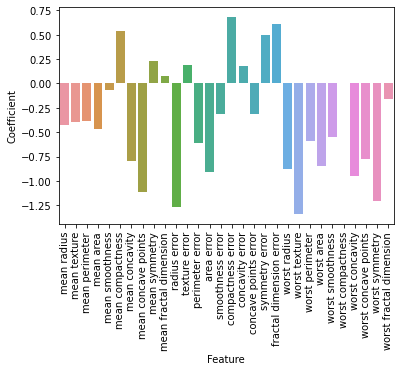

In [52]:
sns.barplot(data=coef_df,x="Feature",y="Coefficient")
plt.xticks(rotation=90);

## Cross Validation

Now sometimes you may end up working with datasets, that have limited data available. Since sufficient data is crucial for machine learning models, splitting your data into a `train`, `test` and `validation` set might really impair the predictive abilities of your model.

Thats is a situation where you want to use `cross validation`. There are multiple ways to go on about `cross validation`, the most common one is implementing the `K-Fold` split.

Here, the whole dataset is split into `k` different sets, the model is fit and evaluated on the remaining parts of the data. We repeat this procedure and report the average performance across all `k splits`.

![crossval](../static/crossval.png)

Atlast, you still want to use a hold-out test set to evaluate your model, but you still save some time.

Also, cross validation can help with overfitting, because you train your model not only on an arbitraty data split, but on multiple instances. 

This gives us a more robust and reliable model estimation.

We import the `cross_val_score` function from `sklearn.model_selection`. We actually dont need to scale our data now, because this will happen implicitly, when we pass the Scaler to a `pipeline` element.

What we also want to do is use something called `Stratified K-Fold`. This is especially helpful when dealing with imbalanced data. `Stratified K-Fold` makes sure, that in each K- split are approximately an equal number of labels (target classes).



In [57]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline 

After importing the modules, we initiate a Pipeline Object. We pass both a Scaler and a Classifier we want to evaluate. Then, we initiate the stratified K Fold. We define `K` with the `n_splits` argument.

At last we simply call cross_val_score.

In [72]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        
    ('classifier', LogisticRegression())  
])

# Set up Stratified K-Fold 
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# call cross validation
cross_val_score(pipeline, X, y, cv=stratified_kfold)

array([0.96842105, 0.96842105, 0.98941799])

### Exercise

Try to fit the cross validation varying splits. Does the output change? 

Try to fit the cross validation function *without* the scaler in the Pipeline object. Does the behavior differ?

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        
    ('classifier', LogisticRegression())  
])

# Set up Stratified K-Fold 
stratified_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# call cross validation
cross_val_score(pipeline, X, y, cv=stratified_kfold)

In [ ]:
# Create the pipeline
pipeline = Pipeline([       
    ('classifier', LogisticRegression())  
])

# Set up Stratified K-Fold 
stratified_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# call cross validation
cross_val_score(pipeline, X, y, cv=stratified_kfold)

### Beyond Classification: Regression

So far, we've seen how logistic regression can be used for classification—deciding which category an observation belongs to, like predicting whether someone will click a button or not. Now, we’re shifting gears from classification to prediction in a continuous sense.

In psychology and many real-world applications, we often want to predict a continuous outcome—like how anxious someone will feel in a situation, or how long they’ll take to respond to a stimulus—based on traits or behaviors. This is called regression.

The idea is: given a set of known features (like personality traits, age, or behavior), can we predict an individual score on some outcome? This lets us model individual differences in a meaningful way.

Here, we will use the `diabetes` dataset from sklearn.

This dataset contains data from 442 patients, and includes predictors like age, BMI (body mass index), blood pressure, and several blood test results. The goal is to predict a continuous outcome: a disease progression score one year after baseline.

In [18]:
from sklearn.datasets import load_diabetes

X_diabetes,y_diabetes = load_diabetes(return_X_y=True,as_frame=True)
diabetes_df = X_diabetes
diabetes_df['target'] = y_diabetes

In [14]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


A low target score relates to a low disease progression, whereas a high target score relates to a high disease progression.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Initialize model and LOOCV
model = LinearRegression()
loo = LeaveOneOut()

In LOOCV, for each iteration, the model is trained on all but one data point (i.e., "leaving out" one sample) and then tested on that left-out data point.

In this dataframe, we have a lot of individual data. We want to see, how good our model can generalize to across individuals.

LOOCV Mean Squared Error (using only BMI): 0.00


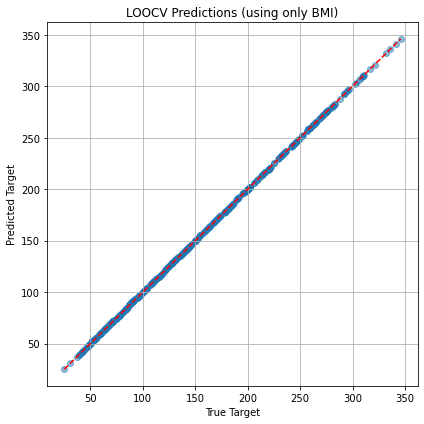

In [ ]:

# Store predictions
y_pred = []
y_true = []
X_diabetes = X_diabetes.to_numpy()
y_diabetes = y_diabetes.to_numpy()
# Perform LOOCV
for train_index, test_index in loo.split(X_diabetes):
    X_train, X_test = X_diabetes[train_index], X_diabetes[test_index]
    y_train, y_test = y_diabetes[train_index], y_diabetes[test_index]

    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])

# Get Loss
mse = mean_squared_error(y_true, y_pred)
print(f"LOOCV Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("True Target")
plt.ylabel("Predicted Target")
plt.title("LOOCV Predictions")
plt.grid(True)
plt.tight_layout()
plt.show()
